In [123]:
import extract_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from scipy.signal import filtfilt, butter, iirnotch, welch
import math
from collections import deque
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [124]:
data_train, words_train, starts_train, ends_train = extract_data.extract_data(r"C:\Users\lwing\College\Spring 2022\Senior Design\SilentSpeechDAS\fEMGData\mouthed_NewVocab_6_18th_set1.txt", r"C:\Users\lwing\College\Spring 2022\Senior Design\silent-speech\scripts\Mouthed_NewVocab_6_18th_set1_take3.txt")
data_test, words_test, starts_test, ends_test = extract_data.extract_data(r"C:\Users\lwing\College\Spring 2022\Senior Design\SilentSpeechDAS\fEMGData\mouthed_NewVocab_6_18th_set2.txt", r"C:\Users\lwing\College\Spring 2022\Senior Design\silent-speech\scripts\Mouthed_NewVocab_6_18th_set2_txt")

2022-04-18T15:41:16.932-05
2022-04-18T16:01:52.268-05


In [125]:
chan_1_test = data_test[:,0]
chan_2_test = data_test[:,1]
chan_3_test = data_test[:,2]
chan_4_test = data_test[:,3]
chan_5_test = data_test[:,4]
chan_6_test = data_test[:,5]
channel_data_test = [chan_1_test, chan_2_test, chan_3_test, chan_4_test, chan_5_test, chan_6_test]

In [126]:
chan_1_train = data_train[:,0]
chan_2_train = data_train[:,1]
chan_3_train = data_train[:,2]
chan_4_train = data_train[:,3]
chan_5_train = data_train[:,4]
chan_6_train = data_train[:,5]
channel_data_train = [chan_1_train, chan_2_train, chan_3_train, chan_4_train, chan_5_train, chan_6_train]

### Creating target variable list

In [127]:
len(chan_1_train)

778050

In [128]:
len(chan_1_test)

791550

In [129]:
y_train = np.zeros(778050)
y_test = np.zeros(791550)

In [130]:
for i in range(len(starts_train)):
    y_train[starts_train[i]:ends_train[i]+1] = 1

In [131]:
for i in range(len(starts_test)):
    y_test[starts_test[i]:ends_test[i]+1] = 1

In [132]:
print(np.count_nonzero(y_train))
print(np.count_nonzero(y_test))

236060
238506


In [133]:
print(len(y_train))
print(len(y_test))

778050
791550


### Filtering

In [134]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_train = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_train):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_train[idx] = abs(signal_filtered)

In [135]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_test = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_test):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_test[idx] = abs(signal_filtered)

### RMS

In [15]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_train:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

In [16]:
rms_window = deque([0,0,0,0,0])

for channel in filtered_data_test:
    for i, sample in enumerate(channel):
        rms_window.popleft()
        rms_window.append(sample)
        val = np.sqrt(sum(np.square(rms_window)/5))
        channel[i] = val

### Deleting extraneous data

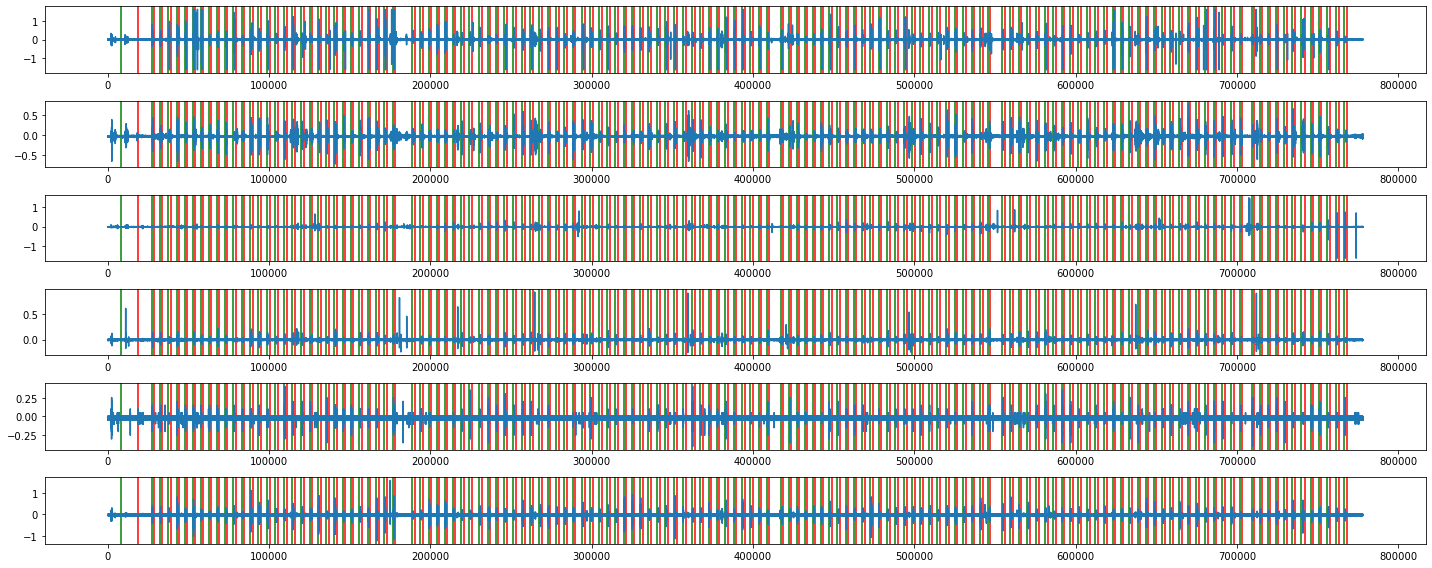

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_train[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_train,-2,2,'g'); plt.vlines(ends_train,-2,2,'r')

plt.tight_layout()
plt.show()

In [138]:
print(starts_train)
print(ends_train)

[  7981  27185  32258  37573  42698  47792  52850  57606  62624  67605
  72813  77795  82976  88260  93447  98639 103917 109207 114416 120017
 125152 130312 135501 140541 145734 150798 155885 161193 166419 171546
 176590 188890 193716 199031 203980 208845 214106 219092 224113 230174
 235467 240689 245808 251248 256765 262049 267327 272717 277997 283005
 288146 294061 299269 304577 309648 314655 319782 324916 329826 335076
 340580 345762 351070 356388 362126 367329 372511 377606 382761 388031
 393287 398400 403535 408684 417375 422545 427270 432237 437282 441888
 446933 452299 457387 462629 467551 472761 477888 482934 488136 493374
 498768 503779 508932 514264 519513 524947 530233 535494 540642 545968
 554500 559463 564729 569845 575325 580763 586191 591353 596422 601668
 606978 612189 617636 622943 628173 633254 638489 643404 648684 653733
 658722 664200 669467 674796 679948 685582 690809 696144 702034 709421
 714210 719093 724264 729250 734318 739584 745882 750866 756043 761412
 76658

In [139]:
#deleting indices :24887,486094-504933, 763442:

for i in range(len(filtered_data_train)):
    arr1 = filtered_data_train[i][27185:178080]
    arr2 = filtered_data_train[i][188890:767978]
    filtered_data_train[i] = np.concatenate((arr1,arr2))
    

In [140]:
len(filtered_data_train[0])

729983

In [141]:
arr1 = y_train[27185:178080]
arr2 = y_train[188890:767978]

y_train = np.concatenate((arr1,arr2))
len(y_train)

729983

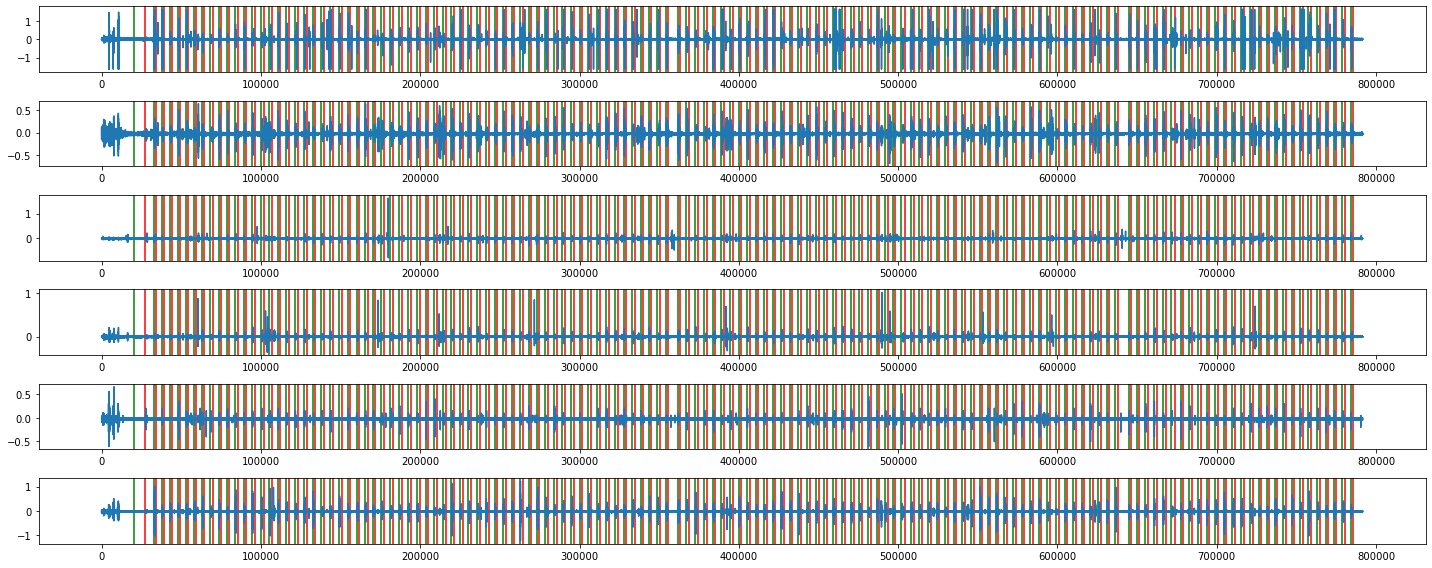

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_test[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_test,-2,2,'g'); plt.vlines(ends_test,-2,2,'r')

plt.tight_layout()
plt.show()

In [88]:
print(starts_test)
print(ends_test)

[ 10892  22393  24937  27675  30499  33368  36238  39092  42112  45055
  47999  50994  54093  57101  60159  63208  66107  68999  71758  74666
  77624  80682  83568 100554 103432 106486 109574 112534 115521 118722
 121791 124905 128109 131141 134298 137316 140247 143224 146296 149467
 152735 155761 158758 161681 164729 167796 170969 174118 177147 180019
 182884 185883 188822 191889 195036 209094 212058 214923 217877 221045
 224154 227283 230393 233444 236423 239446 242581 245577 248659 251760
 254794]
[ 19330  23497  26227  29045  31817  34778  37558  40540  43559  46489
  49506  52589  55611  58612  61685  64656  67554  70267  73131  76082
  79128  82055  84970 101965 104913 108031 110997 114019 117158 120269
 123373 126599 129605 132742 135740 138723 141694 144758 147917 151095
 154196 157242 160126 163214 166249 169408 172511 175626 178483 181325
 184352 187208 190334 193482 196429 210543 213392 216331 219471 222523
 225685 228787 231843 234821 237892 240997 244042 247117 250195 2532

In [143]:
#deleting indices :20750, 747706:

for i in range(len(filtered_data_test)):
    filtered_data_test[i] = filtered_data_test[i][22393:256281]

In [144]:
len(filtered_data_test[0])

233888

In [145]:

y_test = y_test[22393:256281]

### Downsampling y

In [146]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_train_new = np.zeros(int(len(y_train)/20)+1)
i = 0
while ind1 < len(y_train):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_train):
        ind2 = len(y_train)-1
                
    num_label = np.count_nonzero(y_train[ind1:ind2])
    if num_label > 19:
        y_train_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [147]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_test_new = np.zeros(int(len(y_test)/20)+1)
i = 0
while ind1 < len(y_test):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_test):
        ind2 = len(y_test)
                
    num_label = np.count_nonzero(y_test[ind1:ind2])
    if num_label > 19:
        y_test_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [148]:
print(len(y_train))
print(len(y_train_new))
print(len(y_test))
print(len(y_test_new))

729983
36500
233888
11695


### Smoothing data as described by SAD doc

In [149]:
def rms(raw):
        rms_window = deque([0,0,0,0,0])
        rms_data = np.zeros(len(raw))
        for i, sample in enumerate(raw):
            rms_window.popleft()
            rms_window.append(sample)
            val = np.sqrt(sum(np.square(rms_window)/5))
            rms_data[i] = val
            
        return rms_data
    
    
#TO DO: MAKE SURE ARRAY OUT OF BOUNDS CHECK IS SUFFICIENT
def smooth(rms_data):
        
    #large window to average over; sampling rate is 1000 Hz; each sample is a millisecond
    window = 40
        
    #overlap interval
    skip = 20
        
    ind1 = 0
    ind2 = window
    #assuming that the packet size i.e. length of raw data and rms_data will be a multiple of 20
    downsampled = np.zeros(int(len(rms_data)/20)+1)
    i = 0
    while ind1 < len(rms_data):
            
        #remaining data less than window size, avoid array out of bounds
        if ind2 > len(rms_data):
            ind2 = len(rms_data)-1
                
        val = np.mean(rms_data[ind1:ind2], dtype=np.float64)
        downsampled[i] = val
        ind1 = ind1 + skip
        ind2 = ind2 + skip
        i = i+1
            
    return downsampled
        
def calculate(smoothed_envelope):
        
    return np.abs(np.diff(smoothed_envelope))

In [150]:
ready_data_train = [0,0,0,0,0,0]

for i in range(len(filtered_data_train)):
    data_rms = rms(filtered_data_train[i])
    res = smooth(data_rms)
    ready_data_train[i] = res

In [151]:
ready_data_test = [0,0,0,0,0,0]

for i in range(len(filtered_data_test)):
    data_rms = rms(filtered_data_test[i])
    res = smooth(data_rms)
    ready_data_test[i] = res

In [152]:
print(np.count_nonzero(ready_data_train[0]))
print(np.count_nonzero(ready_data_test[0]))

36500
11695


In [153]:
print(len(ready_data_train[0]))
print(len(ready_data_test[0]))

36500
11695


In [154]:
y_train_new = y_train_new[:36500]
print(len(y_train_new))
y_test_new = y_test_new[:11695]
print(len(y_test_new))

36500
11695


### Making dataframe and prepping for decision tree classifier

In [155]:
df_train = pd.DataFrame({
    
    "Chan1": ready_data_train[0],
    "Chan2": ready_data_train[1],
    "Chan6": ready_data_train[5],
    "Y": y_train_new 
})

In [156]:
df_test = pd.DataFrame({
    
    "Chan1": ready_data_test[0],
    "Chan2": ready_data_test[1],
    "Chan6": ready_data_test[5],
    "Y": y_test_new 
})

In [118]:
df_big = pd.DataFrame({
    "Chan1": np.concatenate((ready_data_train[0],ready_data_test[0])),
    "Chan2": np.concatenate((ready_data_train[1],ready_data_test[1])),
    "Chan6": np.concatenate((ready_data_train[5],ready_data_test[5])),
    "Y": np.concatenate((y_train_new,y_test_new))
})

In [157]:
X_train = df_train[['Chan1', 'Chan2', 'Chan6']]
y_train = df_train[['Y']]
X_test = df_test[['Chan1', 'Chan2','Chan6']]
y_test = df_test[['Y']]

In [119]:
X_big = df_big[['Chan1', 'Chan2', 'Chan6']]
y_big = df_big[['Y']]

In [158]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [160]:
print(clf.score(X_test, y_test))

0.7513467293715262


In [161]:
print(np.mean(cross_val_score(clf, X_train, y_train)))

0.7746027397260274


In [162]:
predicted = clf.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(predicted,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, predicted)
print(cm)



0.7513467293715262
[[6287 1702]
 [1206 2500]]


In [175]:
isSpeech = False
inactive_count=0
active_count=0
inactive_thresh = 7
active_thresh = 4

speech_event = np.zeros(11695)

for sample_idx in range(11695):       
    
    num_active = predicted
    
            
    if isSpeech:
        if not num_active[sample_idx]:
            inactive_count += 1
        else:
            inactive_count = 0
            
        if inactive_count > inactive_thresh:
            isSpeech = False
            speech_event[sample_idx] = 0
                    
        else:
            isSpeech = True
            speech_event[sample_idx] = 1
     
        
    else:
        #updating speech event count
        if num_active[sample_idx]:
            active_count += 1
        else:
            active_count = 0
        
        #Speech Event conditional
        if active_count > active_thresh:
            isSpeech = True
            speech_event[sample_idx] = 1
                        
        else:
            isSpeech = False
            speech_event[sample_idx] = 0

In [176]:
ac=accuracy_score(speech_event,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(speech_event, predicted)
print(cm)

0.7791363830696879
[[5831 1365]
 [1662 2837]]


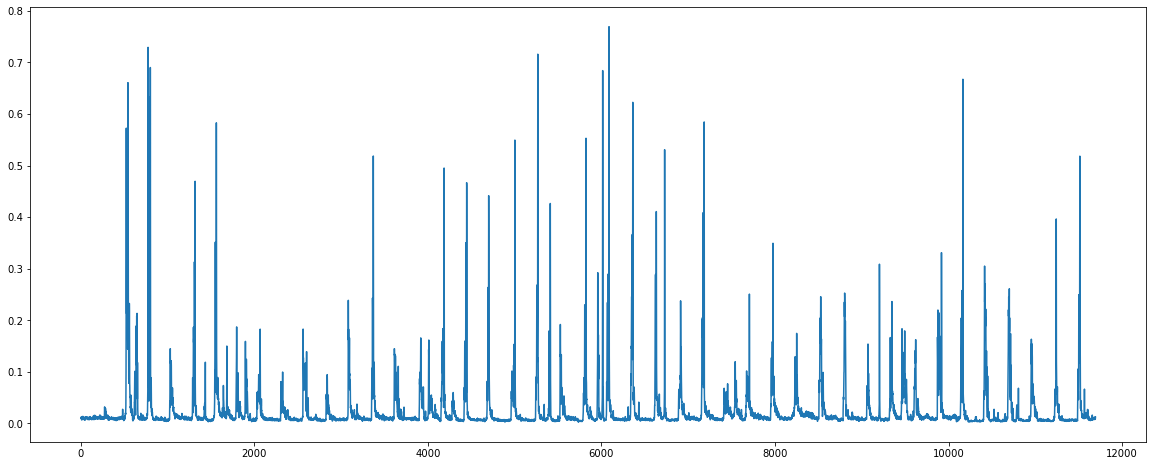

In [177]:
plt.figure(figsize=(20,8))
plt.plot(ready_data_test[0])

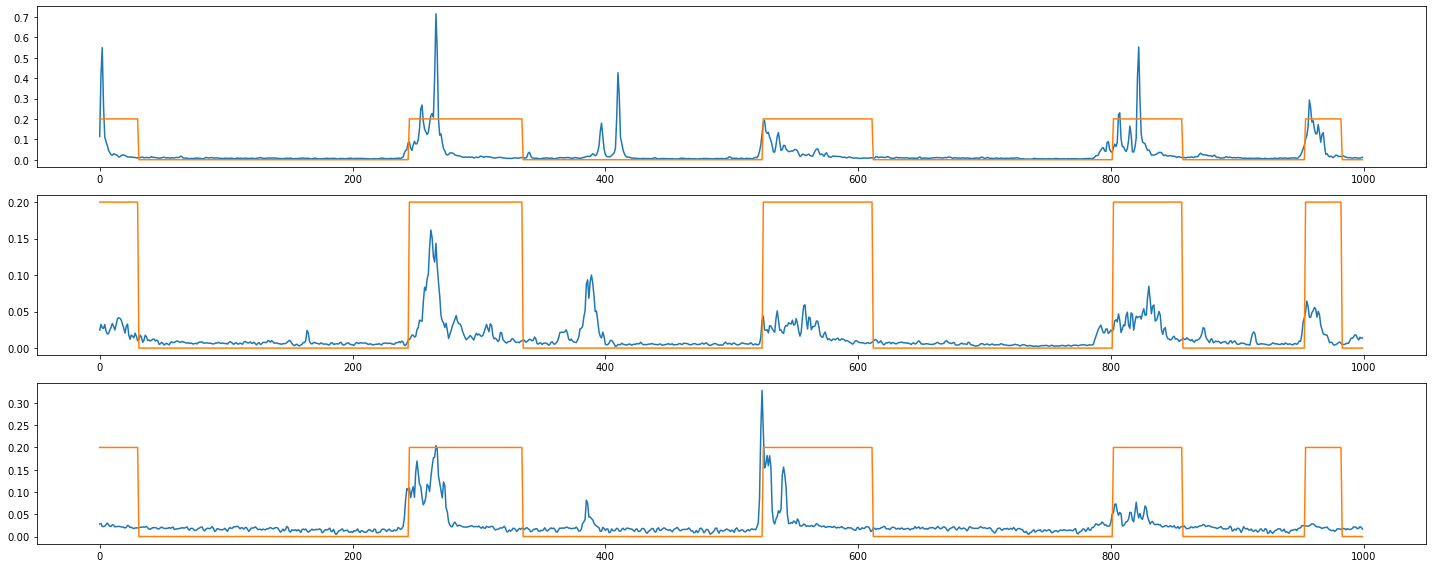

In [178]:
plt.figure(figsize=(20,8))
idx = [0,1,5]
for i, val in enumerate(idx):
    plt.subplot(3,1,i+1)
    plt.plot(ready_data_test[val][5000:6000])
    plt.plot(speech_event[5000:6000]*.2)
    #plt.vlines(starts_test[15:17]/20-5250,-.5,.5,'g'); plt.vlines(ends_test[15:17]/20-5250,-.5,.5,'r')
plt.tight_layout()
plt.show()

In [179]:
import pickle
file_name_scaler = "scaler.pkl"
file_name_classifier = "classifier.pkl"
with open(file_name_scaler, "wb") as open_file:
    pickle.dump(scaler, open_file)
    
with open(file_name_classifier, "wb") as open_file:
    pickle.dump(clf, open_file)

### Testing scaler and clf on new data

In [2]:
import pickle
clf = pickle.load(open("classifier.pkl", 'rb'))
scaler = pickle.load(open("scaler.pkl", 'rb'))

In [5]:
data_train, words_train, starts_train, ends_train = extract_data.extract_data(r"C:\Users\lwing\College\Spring 2022\Senior Design\SilentSpeechDAS\fEMGData\mouthed_NewVocab_finaltesting_set7.txt", r"C:\Users\lwing\College\Spring 2022\Senior Design\silent-speech\scripts\Mouthed_NewVocab_finaltesting_set7.txt")

2022-04-25T16:24:17.106-05


In [6]:
chan_1_train = data_train[:,0]
chan_2_train = data_train[:,1]
chan_3_train = data_train[:,2]
chan_4_train = data_train[:,3]
chan_5_train = data_train[:,4]
chan_6_train = data_train[:,5]
channel_data_train = [chan_1_train, chan_2_train, chan_3_train, chan_4_train, chan_5_train, chan_6_train]

In [7]:
len(chan_1_train)

502200

In [11]:
y_train = np.zeros(502200)

In [12]:
for i in range(len(starts_train)):
    y_train[starts_train[i]:ends_train[i]+1] = 1

In [13]:
# [Band Pass to demonstrate most prominent frequency range]
low_cutoff = 20
high_cutoff = 450

filtered_data_train = [0,0,0,0,0,0]

for idx, channel in enumerate(channel_data_train):
    signal_meancorrect = channel - np.mean(channel)
    
    #60Hz Notch Filter for Power Line Noise
    b, a = iirnotch(60, 30, 1000)
    signal_notched = filtfilt(b, a, signal_meancorrect)

    # Fourth Order Butterworth 
    b, a = butter(10, [low_cutoff, high_cutoff], fs=1000, btype='bandpass')
    signal_filtered = filtfilt(b, a, signal_notched)

    #Rectify signal
    filtered_data_train[idx] = abs(signal_filtered)

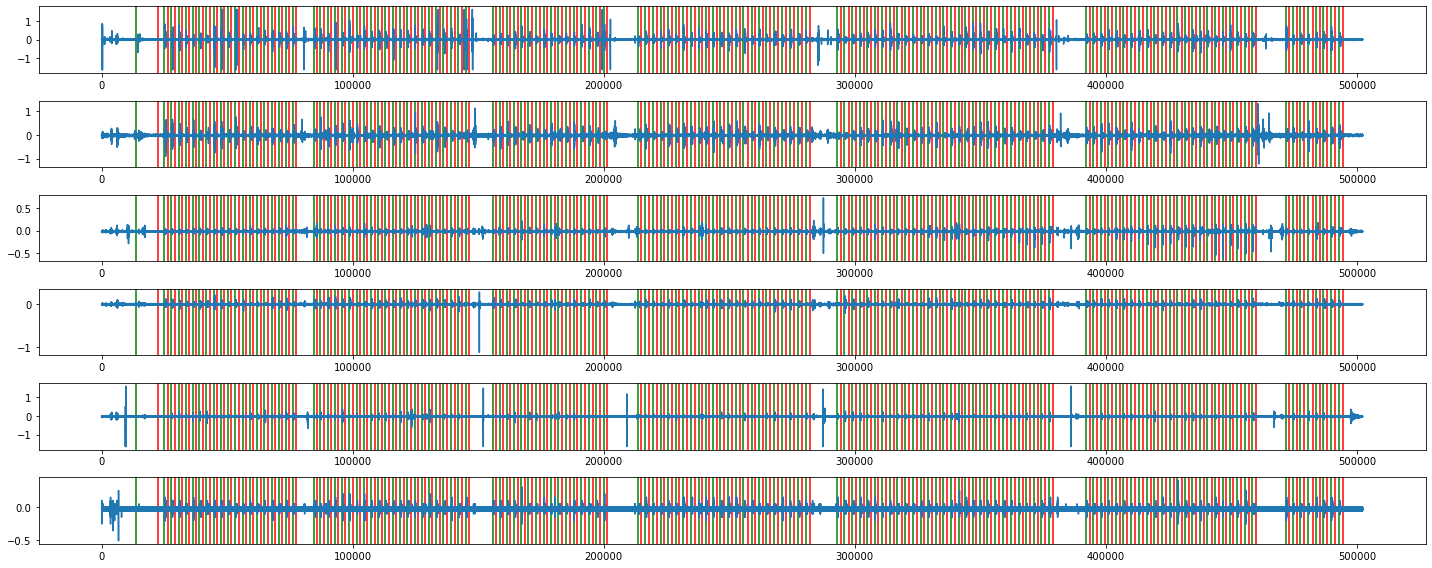

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data



plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.plot(data_train[:,i]); plt.ylim(plt.ylim())
    plt.vlines(starts_train,-2,2,'g'); plt.vlines(ends_train,-2,2,'r')

plt.tight_layout()
plt.show()

In [15]:
print(starts_train)
print(ends_train)

[ 13875  24919  27828  30643  33428  36203  38923  41736  44630  47511
  50344  53188  56137  59038  61821  64847  67700  70575  73455  76172
  84516  87057  90020  92873  95705  98564 101526 104378 107238 110138
 113005 115863 118803 121781 124677 127519 130428 133191 136159 139170
 142100 145081 155696 158588 161465 164334 167139 170005 173062 176013
 178893 181960 184879 187984 190946 193980 197097 200119 213510 216508
 219511 222682 225629 228709 231590 234719 237747 240649 243459 246442
 249549 252595 255624 258854 261670 264642 267705 270952 274042 277317
 280518 293074 295863 298946 302030 304926 307847 310829 313962 316953
 320121 323143 326226 329154 332235 335229 338296 341365 343940 346895
 349800 352739 355842 358943 362126 365245 368169 371206 374240 377235
 392059 394937 397879 400820 403828 406908 409860 412974 416154 419313
 422300 425328 428487 431569 434403 437297 440432 443468 446470 449360
 452166 455210 458244 471645 474468 477350 480403 483725 486572 489598
 49271

In [16]:
for i in range(len(filtered_data_train)):
    filtered_data_train[i] = filtered_data_train[i][24919:494402]

In [17]:
len(filtered_data_train[0])

469483

In [18]:
y_train = y_train[24919:494402]
len(y_train)

469483

In [19]:
#large window to average over
window = 40
        
        #overlap interval
skip = 20
        
ind1 = 0
ind2 = window
y_train_new = np.zeros(int(len(y_train)/20)+1)
i = 0
while ind1 < len(y_train):
            
    #remaining data less than window size, avoid array out of bounds
    if ind2 > len(y_train):
        ind2 = len(y_train)-1
                
    num_label = np.count_nonzero(y_train[ind1:ind2])
    if num_label > 19:
        y_train_new[i] = 1
    ind1 = ind1 + skip
    ind2 = ind2 + skip
    i = i+1

In [20]:
print(len(y_train))
print(len(y_train_new))

469483
23475


In [23]:
ready_data_train = [0,0,0,0,0,0]

for i in range(len(filtered_data_train)):
    data_rms = rms(filtered_data_train[i])
    res = smooth(data_rms)
    ready_data_train[i] = res

In [24]:
print(len(ready_data_train[0]))

23475


In [25]:
y_train_new = y_train_new[:23475]
print(len(y_train_new))

23475


In [26]:
df_train = pd.DataFrame({
    
    "Chan1": ready_data_train[0],
    "Chan2": ready_data_train[1],
    "Chan6": ready_data_train[5],
    "Y": y_train_new 
})

In [27]:
X_test = df_train[['Chan1', 'Chan2','Chan6']]
y_test = df_train[['Y']]

In [28]:
X_test = scaler.transform(X_test)

In [29]:
print(clf.score(X_test, y_test))

0.5887539936102236


In [30]:
predicted = clf.predict(X_test)

#I obtain the accuracy of this fold
ac=accuracy_score(predicted,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(y_test, predicted)
print(cm)


0.5887539936102236
[[9105 3763]
 [5891 4716]]


In [40]:
isSpeech = False
inactive_count=0
active_count=0
inactive_thresh = 
active_thresh = 5

speech_event = np.zeros(23475)

for sample_idx in range(23475):       
    
    num_active = predicted
    
            
    if isSpeech:
        if not num_active[sample_idx]:
            inactive_count += 1
        else:
            inactive_count = 0
            
        if inactive_count > inactive_thresh:
            isSpeech = False
            speech_event[sample_idx] = 0
                    
        else:
            isSpeech = True
            speech_event[sample_idx] = 1
     
        
    else:
        #updating speech event count
        if num_active[sample_idx]:
            active_count += 1
        else:
            active_count = 0
        
        #Speech Event conditional
        if active_count > active_thresh:
            isSpeech = True
            speech_event[sample_idx] = 1
                        
        else:
            isSpeech = False
            speech_event[sample_idx] = 0

In [41]:
ac=accuracy_score(speech_event,y_test)
print(ac)
#I obtain the confusion matrix
cm=confusion_matrix(speech_event, predicted)
print(cm)

0.5963791267305645
[[7735 3588]
 [7261 4891]]


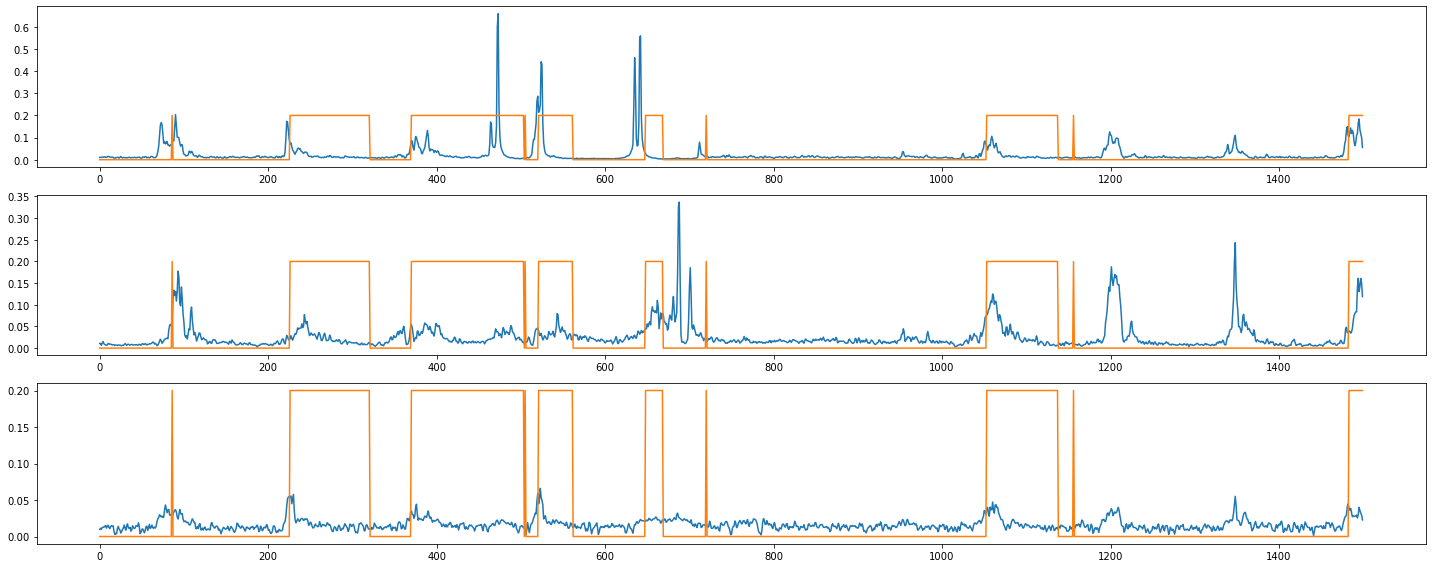

In [42]:
plt.figure(figsize=(20,8))
idx = [0,1,5]
for i, val in enumerate(idx):
    plt.subplot(3,1,i+1)
    plt.plot(ready_data_train[val][5500:7000])
    plt.plot(speech_event[5500:7000]*.2)
    #plt.vlines(starts_train[19]/20-4890,-.5,.5,'g'); plt.vlines(ends_train[19]/20-4890,-.5,.5,'r')
plt.tight_layout()
plt.show()